In [ ]:
import torch
import torch.nn

try:
    from ultralytics import YOLO
except:
    !pip install ultralytics
    from ultralytics import YOLO

/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: <AFB7C78A-1D52-38B1-9D33-93A75FA7D528> /opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <9D4C7FD2-49A8-383A-AC3E-A560DE81B0D8> /opt/anaconda3/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


In [ ]:
# download the dataset
!curl -L "https://universe.roboflow.com/ds/rTSnBOdeq6?key=9TGU3dYlZ2" --output roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   895  100   895    0     0   1203      0 --:--:-- --:--:-- --:--:--  1202
100 18.2M  100 18.2M    0     0  12.2M      0  0:00:01  0:00:01 --:--:-- 12.2M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/20231009_132947_jpg.rf.3efbc254f393279eb709d352589d53a8.jpg  
 extracting: test/images/20231009_133003_jpg.rf.79f86c266a1b904fce294d14d223e36f.jpg  
 extracting: test/images/20231009_133120_jpg.rf.255f7f397f36df359c772dd179408820.jpg  
 extracting: test/images/20231009_133211_jpg.rf.2eb1b58436b0e9025a624ff2eaf61c3a.jpg  
 extracting: test/images/20231009_133237_jpg.rf.8bae0bd7a957a5b571e3a7130f0f1ce7.jpg  
 extracting: test/images/20231009_133300_jpg.rf.693e46d5198ae3b8dfc

In [ ]:
yolo = YOLO('yolov5n.pt')

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [ ]:
yolo.train(data="./data.yaml", epochs=40)

New https://pypi.org/project/ultralytics/8.0.222 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.145 🚀 Python-3.9.7 torch-1.13.1 CPU (Apple M2)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov5n.pt, data=./data.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic

RuntimeError: Dataset 'data.yaml' error ❌ 
Dataset 'data.yaml' images not found ⚠️, missing path '/Users/michaelroytman/Desktop/Bolic/datasets/valid/images'
Note dataset download directory is '/Users/michaelroytman/Desktop/Bolic/datasets'. You can update this in '/Users/michaelroytman/Library/Application Support/Ultralytics/settings.yaml'


image 1/1 /content/test/images/20231016_174531_jpg.rf.9d1c944ca270dc8c1cd248aa0b2befaa.jpg: 640x640 12 Crimps, 5 Jugs, 3 Pinchs, 6 Slopers, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


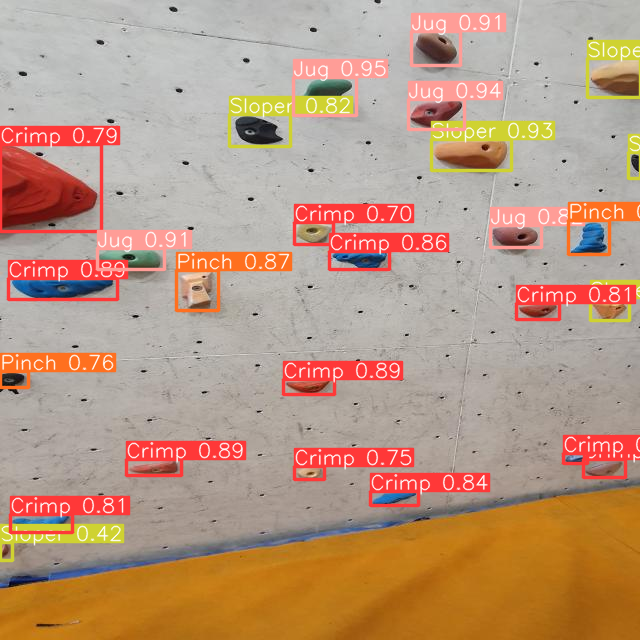

In [ ]:
from PIL import Image
def run_yolo(yolo, image_url, conf=0.25, iou=0.7):
    results = yolo(image_url, conf=conf, iou=iou)
    res = results[0].plot()[:, :, [2,1,0]]
    return Image.fromarray(res)

yolo = YOLO('./runs/detect/train/weights/best.pt')

image_url = './test/images/20231016_174531_jpg.rf.9d1c944ca270dc8c1cd248aa0b2befaa.jpg'

run_yolo(yolo, image_url)

In [ ]:
import shutil
shutil.make_archive("training", 'zip', "runs")

'/content/training.zip'